# Wordle Solver

Observing different data sets

In [40]:
import pandas as pd
import math
import random
from itertools import product

data = pd.read_csv('possible_words.txt')

df = pd.DataFrame(data)

words_list = df['Possible_words']

allowed_data = pd.read_csv('Allowed_words.txt')

all_df = pd.DataFrame(allowed_data)

allowed_words = all_df['Allowed']

words = set(words_list)

allowed_words = set(allowed_words)

n = len(allowed_words)


In [41]:
chars = ['B','G','Y']
possible_results = []
for i in product(chars,repeat = 5):
    possible_results.append(i)

This function is used to retrieve the list of words.

input: none

output: set of words

In [42]:
def get_words():
    data = pd.read_csv('possible_words.txt')
    df = pd.DataFrame(data)
    words = df['Possible_words']
    words = set(words)
    return words
    

The function below calculates the entropy of the word which is how good the word is i.e maximizing the information we gain from the word given the set of words.

inputs: value - for entropy to be calculated, words - set of words

output: entropy

In [43]:
def entropy_expected(value,words):
    lexicon = set()
    for word in words:
        flag = 0
        ent = 0
        for result in possible_results:
            for i in range(5):
                if result[i] == 'B':
                    if value[i] not in word:
                        flag += 1
                elif result[i] == 'G':
                    if value[i] == list(word)[i]:
                        flag += 1
                elif result[i] == 'Y':
                    if value[i] in word and value[i] != list(word)[i]:
                        flag += 1
            if flag == 5:
                lexicon.add(word)
            prob = len(lexicon)/n
            if prob != 0:
                ent += (-1)*prob*(math.log2(prob))
            else:
                ent = 0
    return ent
            
            
        

The function below gives the result when we guess each word in the wordle game

B - letter not in word (wordle-Grey)

Y - letter in word but wrong placement (wordle - Yellow)

G - letter in word and in correct place (wordle - Green)

inputs: value - our guess, answer

output: wordle output in above format

In [44]:
def wordle_output(value,answer):
    res = ""
    for i in range(5):
        if value[i] not in answer:
            res += "B"
        if value[i] in answer:
            if value[i] == answer[i]:
                res += "G"
            elif value[i] in value[0:i]:
                res += "B"
            else:
                res += "Y"
    return res



This function below gives the all the possible answer that can exist after looking at the ouput of wordle game

inputs: value - our guess, result - wordle output in the format above, words - set of words

output: words - updated set of words for our subsequent guesses

In [71]:
def information(value,result,words):
    info = 0
    lexicon = set()
    for word in words:
        flag = 0
        for i in range(5):
            
            if result[i] == 'B':
                if value[i] not in word:
                    flag += 1
                elif value[i] in word and value[i] in value[0:i] and value[i] != list(word)[i]:
                    flag += 1
            elif result[i] == 'G':
                if value[i] == list(word)[i]:
                    flag += 1
            elif result[i] == 'Y':
                if value[i] in word and value[i] != list(word)[i]:
                    flag += 1
        if flag == 5:
            lexicon.add(word)
    prob = len(lexicon)/n
    if prob != 0:
        info += (-1)*(math.log2(prob))
    return lexicon
    
                

The function below guesses the best word to choose based on the entropy expected and also prints out best 5 guesses based on the entropy expected.

input: words - updated set of words

output: word to guess

In [78]:
def next_guess(words):
    max_entropies = [0]*5
    possible_guesses = [0]*5
    ent_all_words = {}
    for word in words:
        ent_all_words[word] = entropy_expected(word,words)
    for w in ent_all_words:
        for j in range(5):
            if ent_all_words[w] > max_entropies[j]:
                max_entropies.insert(j,ent_all_words[w])
                possible_guesses.insert(j,w)
                max_entropies.pop()
                possible_guesses.pop()
                # result[j] = i
                break
#     print(possible_guesses)
    if possible_guesses[0] != 0:
        return possible_guesses[0]
    else:
        return "???"

The function below is a test bot to play wordle on a random word and try to return the score based on the number of guesses

In [83]:
def test_bot():
    words = get_words()
    answer = random.choices(words_list, k=1)[0]
    guess = 'salet'
    score = 1
    for i in range(5):
        result = wordle_output(guess,answer)
        print("result for "+guess+" is "+result )
        if result == 'GGGGG':
            print("Score:",score)
            print("Yayyyyy")
            return score
        words = information(guess,result,words)
        guess = next_guess(words)
        print("Guessing...", guess)
        score += 1
        if guess == "???":
            print("Failed")
            break
    print("The answer is:",answer)
    return 99

Demonstration of the test_bot

In [67]:
test_bot()

['bused', 'usher', 'nosey', 'poser', 'riser']
['usher', 0, 0, 0, 0]


3

In [82]:
avg_score = 0

for i in range(100):
    avg_score += test_bot()
print(avg_score/100)

3.25


The below function is used to play the wordle on the official site it shows you the guess to pick

inputs: value - our previous guess, result - output for our guess, words - set of words

output: prints the word to try in the next guess, words - updates set of words 

In [38]:
def suggest_word(value,result,words):
    if (result != 'GGGGG'):
        words = information(value,result,words)
        guess = next_guess(words)
        print("Try this word:",guess)
        return words
    else:
        print("We guessed it!!")
        words = get_words()
        return words

The below is demonstration with the official wordle game

In [72]:
words = get_words()

We always pick the word salet as our starter for maximum entropy

In [73]:
words = suggest_word('salet','BBBBY',words)

['tooth', 'thong', 'motif', 'third', 'motto']
Try this word: tooth


In [74]:
words = suggest_word('tooth','YBBBG',words)

['butch', 'hitch', 'witch', 'pitch', 'dutch']
Try this word: butch


In [75]:
words = suggest_word('butch','BGGGG',words)

['hutch', 'dutch', 0, 0, 0]
Try this word: hutch


As we can see hutch is the correct answer

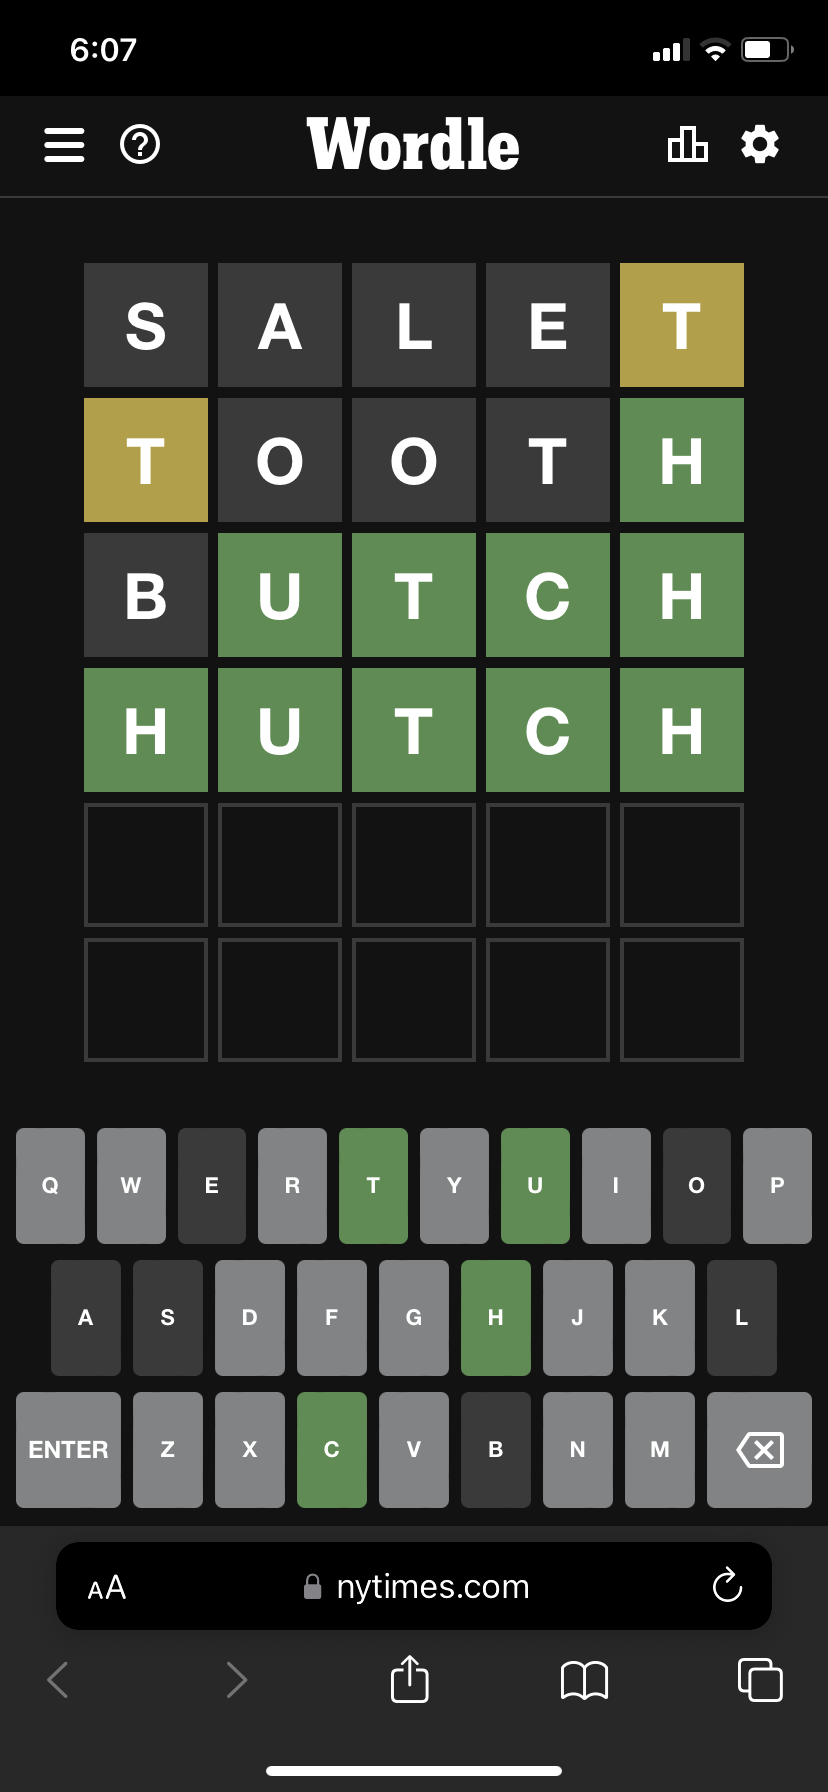

The official game can be played in the site below

https://www.nytimes.com/games/wordle/index.html